# Polynomial Regression:

- Extension of Linear regression, used when it's not possible to find the linear relations from the data. when data shows curved pattern.

**Hypothesis Function:**
- n-degree polynomial: $h(x) = y = \theta_0 + \theta_1 x + \theta_2 x^2 + ... + \theta_d x^d$

In [214]:
import warnings, os
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
# 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
warnings.filterwarnings('ignore')

In [162]:
# Sample Data:

x1 = 2 * np.random.rand(1000,1)
x2 = 3 * np.random.rand(1000,1)
X = np.hstack([x1,x2])
y = 1 + 2*x1.ravel() + 3*x2.ravel() + (3/2)*(x1*x2).ravel() + np.random.normal(0, 1, 1000)*1

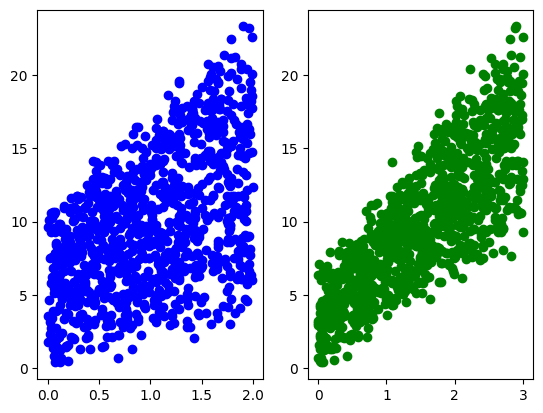

In [163]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(x1, y, color='blue')
ax[1].scatter(x2, y, color='green')
plt.show()

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### Building Polynomial Regression pipeline:

In [165]:
DEGREE = 2

In [166]:
pipe = make_pipeline(
    PolynomialFeatures(DEGREE), #performs the transformation of the inputs to degree poly...
    LinearRegression()
)

# Direct LR model for R2 comparison:
lr = LinearRegression()

In [167]:
lr.fit(X_train, y_train)
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [168]:
y_pred = pipe.predict(X_test)
y_pred_lr = lr.predict(X_test)

In [169]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [170]:
print(f"""LINEAR REGRESSION:
    R2 Score: {lr.score(X_test, y_test)}
    MAE: {mean_absolute_error(y_test, y_pred_lr)}
    RMSE: {mean_squared_error(y_test, y_pred_lr)**0.5}
{'-'*75}""")
print(f"""
POLYNOMIAL REGRESSION:
    R2 Score: {pipe.score(X_test, y_test)}
    MAE: {mean_absolute_error(y_test, y_pred)}
    RMSE: {mean_squared_error(y_test, y_pred)**0.5}""")

LINEAR REGRESSION:
    R2 Score: 0.9284389901406231
    MAE: 1.0079398894955296
    RMSE: 1.2843940694305405
---------------------------------------------------------------------------

POLYNOMIAL REGRESSION:
    R2 Score: 0.9564328320531088
    MAE: 0.8016634337133094
    RMSE: 1.0021661422106867


---

# Ridge Regression:

- Also known as L2 Regularization.
- This add a penalty term to the least squares objective function.
- This is used to prevent the overfitting as it adds some penalties while updating the weights.

In mathematical terms, the Cost Function is as follow:

$$
    J_{ridge}(w) = \frac{1}{n} \sum_{i=1}^{n}{(y_i(actual) - y_i(pred))^2} + \alpha \sum_{j=1}^{p}w_j^2
$$

- $\alpha$ - regularization strength:
    - $\alpha = 0$ -> linear regression.
    - $\uparrow \alpha$ -> more shrinkage -> smaller weights


When to use this:

- Plot the correlations [values > 0.8 or < -0.8 -> strong correlation]


In [266]:
X = np.sort(5 * np.random.rand(1000, 1), axis=0)
y = np.cos(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

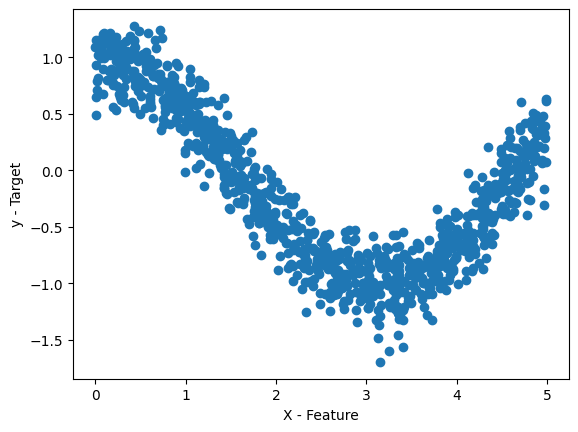

In [267]:
plt.scatter(X, y)
plt.xlabel('X - Feature')
plt.ylabel('y - Target')
plt.show()

In [268]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [269]:
from sklearn.linear_model import Ridge

DEGREE = 15
ALPHA = 10

pipe = make_pipeline(
    PolynomialFeatures(DEGREE),
    Ridge(alpha=ALPHA)
)

slr = LinearRegression()

In [270]:
slr.fit(X, y)
pipe.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=15)),
                ('ridge', Ridge(alpha=10))])

In [271]:
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_test = np.cos(X_test).ravel() + np.random.normal(0, 0.2, X_test.shape[0])
y_pred = pipe.predict(X_test)
y_pred_slr = slr.predict(X_test)

In [272]:
print(f"""LINEAR REGRESSION:
    R2 Score: {slr.score(X_test, y_test)}
    MAE: {mean_absolute_error(y_test, y_pred_slr)}
    RMSE: {mean_squared_error(y_test, y_pred_slr)**0.5}
{'-'*75}""")
print(f"""
RIDGE REGRESSION:
    R2 Score: {pipe.score(X_test, y_test)}
    MAE: {mean_absolute_error(y_test, y_pred)}
    RMSE: {mean_squared_error(y_test, y_pred)**0.5}""")

LINEAR REGRESSION:
    R2 Score: 0.39780994719477636
    MAE: 0.47425376812048126
    RMSE: 0.5444262770557631
---------------------------------------------------------------------------

RIDGE REGRESSION:
    R2 Score: 0.9281123278034664
    MAE: 0.14746493622987322
    RMSE: 0.18810463644281689


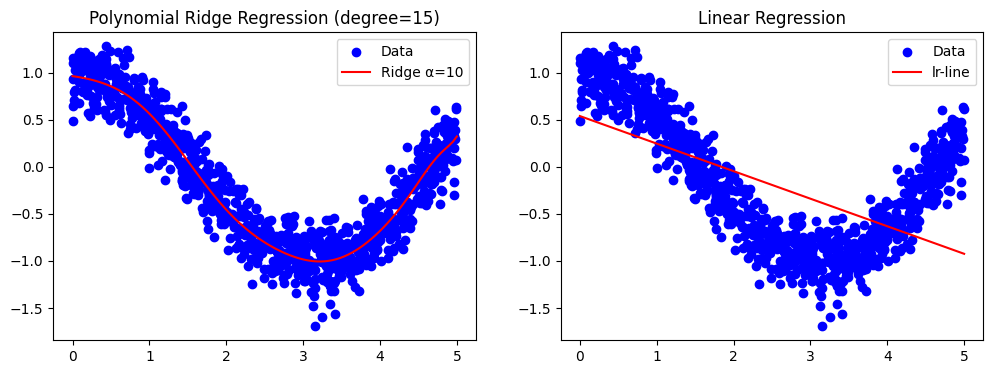

In [283]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
axes[0].scatter(X, y, color='blue', label='Data')
axes[0].plot(X_test, y_pred, color='red', label=f'Ridge α={ALPHA}')
axes[0].legend()
axes[0].set_title(f'Polynomial Ridge Regression (degree={DEGREE})')
# plt.show()

axes[1].scatter(X, y, color='blue', label='Data')
axes[1].plot(X_test, y_pred_slr, color='red', label=f'lr-line')
axes[1].legend()
axes[1].set_title(f'Linear Regression')
plt.show()

---
By Kirtan Ghelani $@SculptSoft$